In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne

In [3]:
%matplotlib inline

Subject-1_VR.fif
Opening raw data file C:\Users\jmk44\Desktop\Brain-Signals-Computing-for-Human-Computer-Interaction\preproc_vr_data\Subject-1_VR.fif...
Isotrak not found
    Range : 0 ... 23052 =      0.000 ...   180.094 secs
Ready.
Reading 0 ... 23052  =      0.000 ...   180.094 secs...


<ipython-input-13-423ae4daaa55>:5: RuntimeWarning: This filename (C:\Users\jmk44\Desktop\Brain-Signals-Computing-for-Human-Computer-Interaction\preproc_vr_data\Subject-1_VR.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw =  mne.io.read_raw_fif(raw_filename, preload=True)


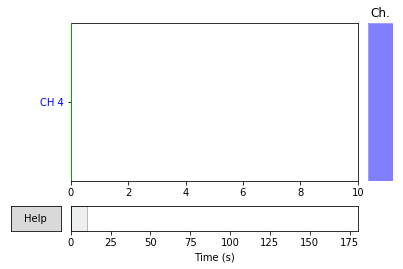

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 1 columns):
Chan    0 non-null float64
dtypes: float64(1)
memory usage: 165.1 KB
Subject-2_VR.fif
Opening raw data file C:\Users\jmk44\Desktop\Brain-Signals-Computing-for-Human-Computer-Interaction\preproc_vr_data\Subject-2_VR.fif...
Isotrak not found
    Range : 0 ... 23054 =      0.000 ...   180.109 secs
Ready.
Reading 0 ... 23054  =      0.000 ...   180.109 secs...


<ipython-input-13-423ae4daaa55>:5: RuntimeWarning: This filename (C:\Users\jmk44\Desktop\Brain-Signals-Computing-for-Human-Computer-Interaction\preproc_vr_data\Subject-2_VR.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw =  mne.io.read_raw_fif(raw_filename, preload=True)


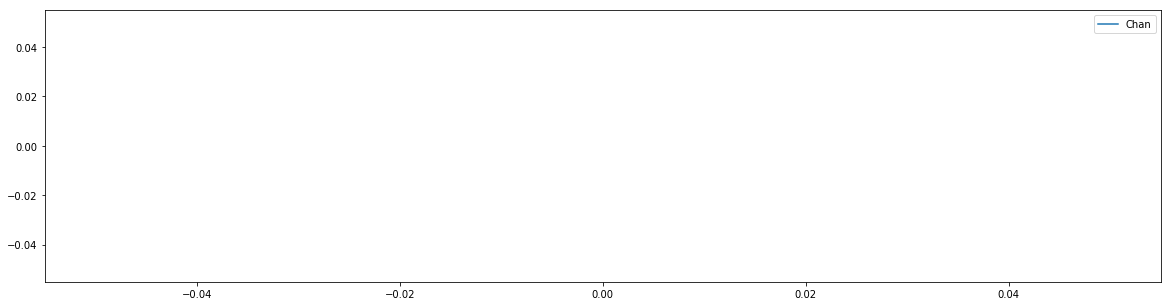

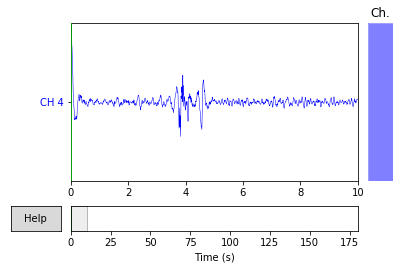

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 1 columns):
Chan    21120 non-null float64
dtypes: float64(1)
memory usage: 165.1 KB
Subject-3_VR.fif
Opening raw data file C:\Users\jmk44\Desktop\Brain-Signals-Computing-for-Human-Computer-Interaction\preproc_vr_data\Subject-3_VR.fif...
Isotrak not found
    Range : 0 ... 23094 =      0.000 ...   180.422 secs
Ready.
Reading 0 ... 23094  =      0.000 ...   180.422 secs...


<ipython-input-13-423ae4daaa55>:5: RuntimeWarning: This filename (C:\Users\jmk44\Desktop\Brain-Signals-Computing-for-Human-Computer-Interaction\preproc_vr_data\Subject-3_VR.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw =  mne.io.read_raw_fif(raw_filename, preload=True)


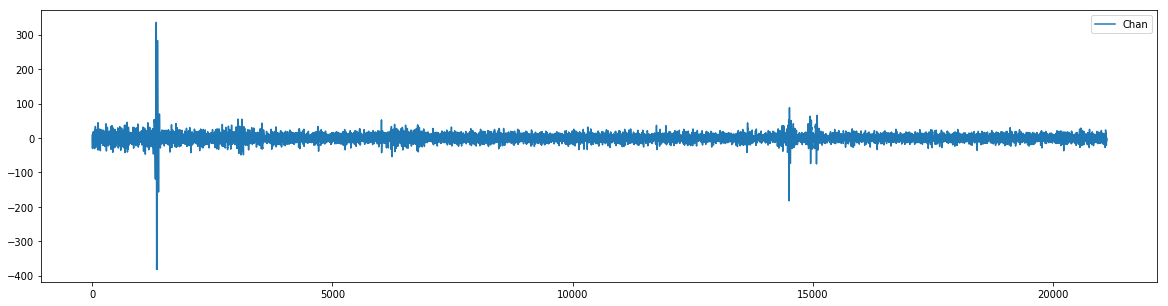

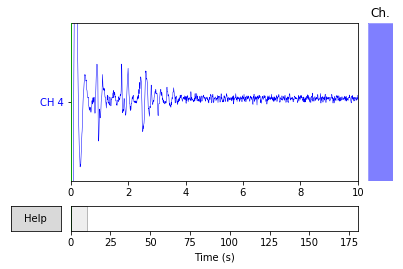

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 1 columns):
Chan    21120 non-null float64
dtypes: float64(1)
memory usage: 165.1 KB
Subject-4_VR.fif
Opening raw data file C:\Users\jmk44\Desktop\Brain-Signals-Computing-for-Human-Computer-Interaction\preproc_vr_data\Subject-4_VR.fif...
Isotrak not found
    Range : 0 ... 23098 =      0.000 ...   180.453 secs
Ready.
Reading 0 ... 23098  =      0.000 ...   180.453 secs...


<ipython-input-13-423ae4daaa55>:5: RuntimeWarning: This filename (C:\Users\jmk44\Desktop\Brain-Signals-Computing-for-Human-Computer-Interaction\preproc_vr_data\Subject-4_VR.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw =  mne.io.read_raw_fif(raw_filename, preload=True)


ValueError: No channels match the selection.

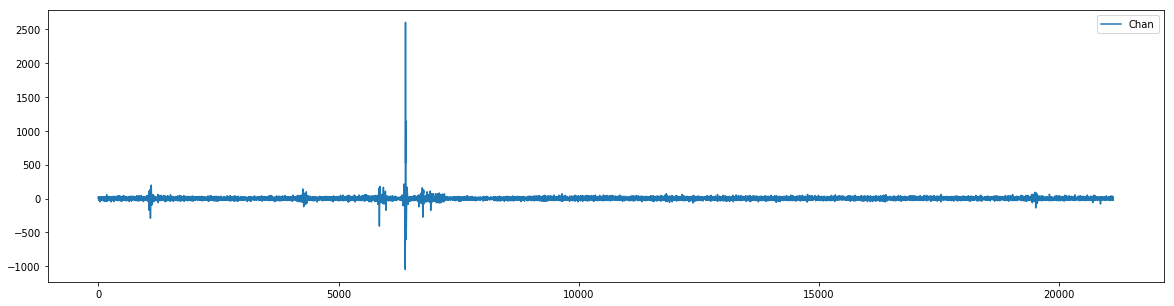

In [13]:
raw_filename = "Subject-6_VR.fif"

def init_dataplot(raw_filename):
    # Loading data
    raw =  mne.io.read_raw_fif(raw_filename, preload=True)
    nchan = raw.info['nchan']
    raw.info['ch_names']


    # ploting only one channel
    scalings = {'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400}
    color = {'eeg':'blue'}
    ch_names = raw.info['ch_names']
    raw_pick = raw.pick_channels(["CH 4"])  # getting one channel data
    raw_pick.plot(n_channels=1,scalings=scalings, color=color, title='Data from Channels', show=True, block=True);


    # Getting one channel data as dataframe
    raw_pick = raw.pick_channels(["CH 4"]) # get single channel 
    start, stop = raw_pick.time_as_index([10, 175]) # 10 s to 175 s data segment

    picks = mne.pick_types(raw_pick.info, eeg=True, exclude=[])
    data, times = raw_pick[picks[:], start:stop]

    final_df = pd.DataFrame(data=data.T, columns=['Chan'])  # 1st row as the column names
    final_df.head()

# Columns should be [Subject, Frequency, PSD]

    psd_df = pd.DataFrame()
    final_df.info()
    final_df.plot(figsize=(20,5))

# init_dataplot(raw_filename)

for i in range(1,17):
    raw_filename = list (raw_filename)
    raw_filename[8] = str(i)    
    raw_filename = "".join(raw_filename)
    print(raw_filename)
#     init_datplot(raw_filename)
    
    while True:
        try:
            init_dataplot(raw_filename)
            break
        except (RuntimeError, TypeError, NameError):
            print("channel ::: ")
            print(i)
            print ("no channel here ___!!!___!!!___ ")
            pass
#             break
    

In [ ]:
# Loading data
raw =  mne.io.read_raw_fif("Subject-6_Non-VR.fif", preload=True)
nchan = raw.info['nchan']
raw.info['ch_names']
# print("OO OO OO OO")
# print(raw.n_times)
# https://martinos.org/mne/stable/generated/mne.io.Raw.html?highlight=raw%20object
'''
Attributes:	

info : dict

    Measurement info.
ch_names : list of string

    Channel names.
n_times : int

    Number of time points.
times : ndarray

    Time points.
preload : bool

    Indicates whether raw data are in memory.
verbose : bool, str, int, or None

    See above.

'''

In [ ]:
# ploting only one channel
scalings = {'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400}
color = {'eeg':'blue'}

ch_names = raw.info['ch_names']

raw_pick = raw.pick_channels(["CH 1"])  # getting one channel data | got from https://github.com/mne-tools/mne-python/issues/4699


### or 4 

raw_pick.plot(n_channels=1,scalings=scalings, color=color, title='Data from Channels', show=True, block=True);

In [ ]:
# Getting one channel data as dataframe
raw_pick = raw.pick_channels(["CH 1"]) # get single channel 

### or CH 1
start, stop = raw_pick.time_as_index([10, 175]) # 10 s to 175 s data segment

picks = mne.pick_types(raw_pick.info, eeg=True, exclude=[])
data, times = raw_pick[picks[:], start:stop]

final_df = pd.DataFrame(data=data.T, columns=['Chan'])  # 1st row as the column names
final_df.head()

# Columns should be [Subject, Frequency, PSD]

psd_df = pd.DataFrame()

In [ ]:
final_df.info()

In [ ]:
final_df.plot(figsize=(20,5))

In [ ]:
# importing modules 
import statistics
from scipy import signal
from scipy.stats import kurtosis
import csv

In [ ]:
len(data[0])

### Power Spectral Density

## <div style="color:red"> Not sure, how to choose Sample Frequency and Window length parameters but I try </div>

I have used following resources for PSD:

https://raphaelvallat.com/bandpower.html

https://sapienlabs.co/factors-that-impact-power-spectrum-density-estimation/

In [ ]:
from scipy import signal
import seaborn as sns

# Define sampling frequency
sf = 100
# Define window length (4 seconds)
win = 2 * sf

freqs, psd = signal.welch(data[0], sf, nperseg=win)

df = pd.DataFrame([freqs,psd])

df = df.T

df.columns = ['Frequency','PSD']

df

In [ ]:
# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(10, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

In [ ]:
# Columns should be [Subject, Frequency, PSD]

psd_df = pd.DataFrame()